In [1]:
import urllib.request as ur
from bs4 import BeautifulSoup as bs
import usecsv

url='https://www.koreabaseball.com/TeamRank/TeamRank.aspx'

soup = bs(ur.urlopen(url).read(), 'html.parser')
# print(soup)

# tr_list =soup.find_all('tr')
tr_list = soup.select("#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr")

print(tr_list[0]) # select는 list형태로 데이터 저장, 첫번째 것을 출력해봤다.
print(tr_list[1])

# td = tr_list[1].find_all('td')
# print(td)

KBO_info=[['순위', '팀명', '경기', '승', '패', '무', '승률', '게임차', '최근10경기', '연속', '홈', '방문' ]]

for tr in tr_list:
  td = tr.find_all('td')
  KBO_info.append([td[0].text, td[1].text, td[2].text, td[3].text, td[4].text, td[5].text, td[6].text, td[7].text, td[8].text, td[9].text, td[10].text, td[11].text])
 
usecsv.writecsv('KBO_info.csv', KBO_info)


# print(td[0].text)
# print(td[1].text)
# print(td[2].text)
# print(td[3].text)
# print(td[4].text)
# print(td[5].text)
# print(td[6].text)
# print(td[7].text)
# print(td[8].text)
# print(td[9].text)
# print(td[10].text)
# print(td[11].text)


<tr>
<td>1</td>
<td>SSG</td>
<td>144</td>
<td>88</td>
<td>52</td>
<td>4</td>
<td>0.629</td>
<td>0</td>
<td>4승0무6패</td>
<td>4패</td>
<td>49-0-23</td>
<td>39-4-29</td>
</tr>
<tr>
<td>2</td>
<td>키움</td>
<td>144</td>
<td>80</td>
<td>62</td>
<td>2</td>
<td>0.563</td>
<td>9</td>
<td>5승0무5패</td>
<td>1승</td>
<td>39-1-32</td>
<td>41-1-30</td>
</tr>


In [2]:
import pandas as pd
df = pd.read_csv('KBO_info.csv')
df.head() #데이터의 일부분을 확인 df.head()

,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,1,SSG,144,88,52,4,0.629,0.0,4승0무6패,4패,49-0-23,39-4-29
1,2,키움,144,80,62,2,0.563,9.0,5승0무5패,1승,39-1-32,41-1-30
2,3,LG,144,87,55,2,0.613,2.0,4승0무6패,1승,38-1-33,49-1-22
3,4,KT,144,80,62,2,0.563,9.0,7승0무3패,1패,40-1-31,40-1-31
4,5,KIA,144,70,73,1,0.490,19.5,7승0무3패,1패,31-0-41,39-1-32


In [3]:
df['팀명'].unique()

array(['SSG', '키움', 'LG', 'KT', 'KIA', 'NC', '삼성', '롯데', '두산', '한화'],
      dtype=object)

In [4]:
df['엘롯기'] = ['레져야구' if item in ['LG', '롯데', 'KIA'] else '근본야구' for item in list(df['팀명'])]

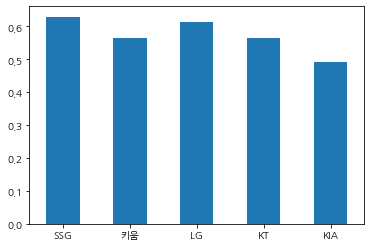

In [6]:
import matplotlib.pyplot as plt
df['승률'].head(5).plot(kind='bar') 
plt.xticks(range(5), labels=df['팀명'].head(5), rotation=0)
plt.show() #쇼로 보자

팀명별 승률을 보여주는 표

팀별로 승률을 분석하는 그래프, 5개팀만 출력

In [9]:
# 한글 폰트 설정, 실행 후 런타임 다시시작 해야한다
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


In [5]:
# 한글 폰트 설정, 런타임 재시작 후 이 구문을 실행. 이후에 그래프 출력시 한글폰트 출력
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

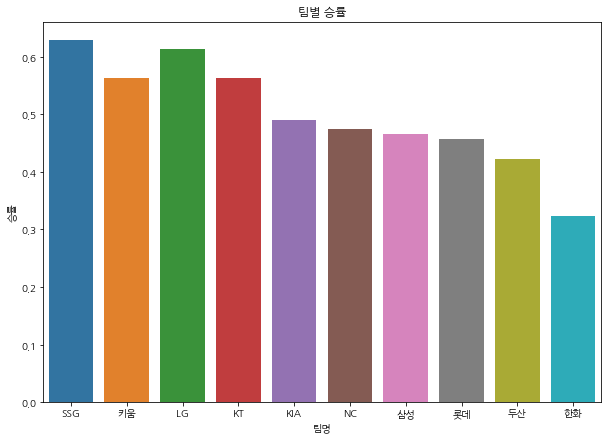

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.barplot(x='팀명', y='승률', data= df.head(10))

plt.title('팀별 승률') 
plt.xticks(rotation=0)
plt.show() 

팀별로 승률을 비교하는 그래프

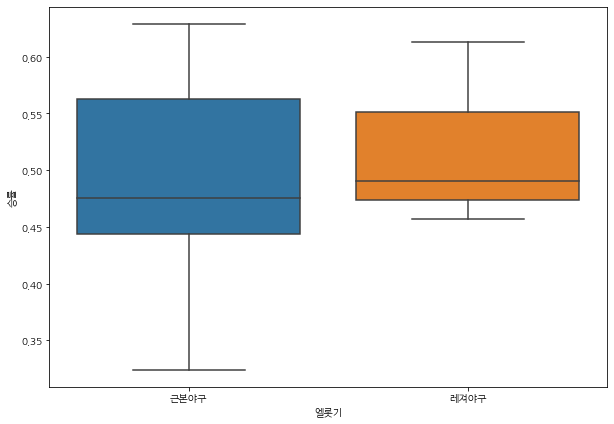

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='엘롯기', y='승률', data=df)
plt.show()  #엘롯기 승률 평균은 다른 구단들의 승률의 평균보다 높다

엘지, 롯데, 기아의 승률 평균은 다른 구단들의 승률 평균보다 높다

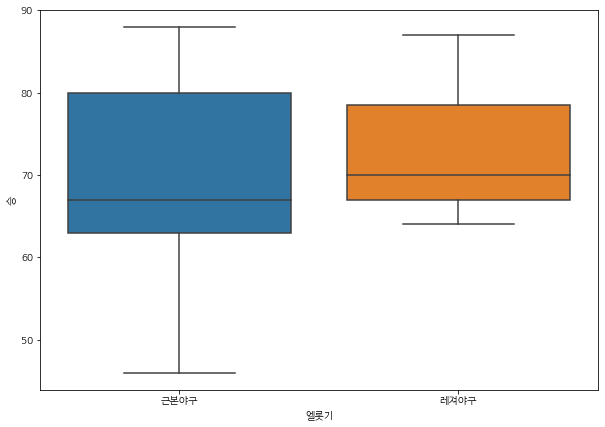

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='엘롯기', y='승', data=df)
plt.show() # 엘롯기, 레져야구가 기대치보단 잘했다고 볼 수 있겠다

엘지, 롯데, 기아의 평균 승수는 타 구단의 평균 승수보다 근사하게 높다